<a href="https://colab.research.google.com/github/TheDenk/augmixations/blob/feature%2Fno_blots/examples/cutout_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install augmixations

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from augmixations import Cutout

##Help functions

In [3]:
def show_img(image, figsize=(4, 6), title=None):
    img = image.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(img)
    plt.axis(False)
    plt.show()

def create_img_with_circle(img_h=500, img_w=500, xc=250, yc=250,r=100, color=(150, 150, 150)):
    label = 'circle'
    img = np.ones((img_h, img_w, 3), dtype=np.uint8)*255
    img = cv2.circle(img, (xc, yc), r, color, -1)
    return img, np.array([np.array([xc -  r, xc - r, xc + r, xc + r])]), np.array([label])

def draw_boxes(new_img, boxes, labels):
    frame = new_img.copy()
    
    for (x1, y1, x2, y2), label in zip(boxes, labels): 
        thickness = 2
        font_scale = 1
    
        frame = cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 3)
        frame = cv2.putText(frame, label, (int(x1), int(y1 - 15)), cv2.FONT_HERSHEY_SIMPLEX ,  
                                   font_scale, (0, 0, 255), thickness, cv2.LINE_AA) 
        
    return frame

##Create images

In [4]:
img, boxes, labels = create_img_with_circle()

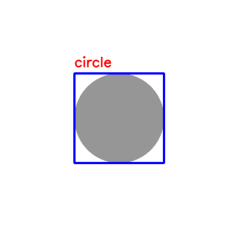

In [5]:
marked_img = draw_boxes(img, boxes, labels)
show_img(marked_img)

##Simple usage

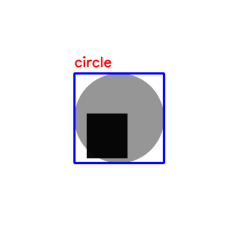

In [6]:
cutmix = Cutout()
new_img, new_boxes, new_labels = cutmix(
                            img, 
                            boxes,
                            labels,
                           )

marked_img = draw_boxes(new_img, new_boxes, new_labels)
show_img(marked_img)

##Advanced usage (with configs)

In [7]:
cr_config = {
    'crop_x': (None, None),
    'crop_y': (None, None),
    'rect_h': (50, 400),
    'rect_w': (50, 400),
    'transparency': (0.0, 0.5),
    'hole_nums': (2, 5),
}

pb_config = {
    'transp_box_visibility': 0.1,
    'max_overlap_area_ratio': 0.75,
    'min_height_result_ratio': 0.25,
    'min_width_result_ratio': 0.25,
    'max_height_intersection': 0.9,
    'max_width_intersection': 0.9,
}

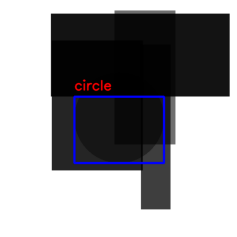

In [8]:
cutout = Cutout(cr_config, pb_config)
new_img, new_boxes, new_labels = cutout(img, boxes, labels)

marked_img = draw_boxes(new_img, new_boxes, new_labels)
show_img(marked_img)